In [1]:
from micrograd.engine import Value
import micrograd.mlp_neural_network as nn
from drawgraph.neuralnet import draw_dot

In [2]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [3]:
mlp = nn.MLP(3, [4, 4, 1]) # (nin, nouts) where 'nin': no. of inputs at leaf, 'nouts': no. of neurons/output at each layer of total 'len(nouts)' layer

In [4]:
ypred = [mlp(x) for x in xs] # currently predicted outputs
ypred

[Value(data = 0.5112189312901688),
 Value(data = 0.7863413143114778),
 Value(data = 0.5526855143448405),
 Value(data = 0.6408762369251021)]

In [5]:
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(data = 5.96972440800656)

In [ ]:
draw_dot(loss) #visualize the current forward pass upto the loss function

For loop (N iterations) to minimize the Loss Function using **Gradient Descent**

In [7]:
for k in range(50):
  
  # forward pass
  ypred = [mlp(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in mlp.parameters():
    p.grad = 0.0 # super important to flush the grads
  loss.backward()
  
  # update parameters with gradient descent
  for p in mlp.parameters():
    p.data += -0.1 * p.grad
  
  print(k, loss.data)

0 5.96972440800656
1 3.661735314083772
2 2.254008183807914
3 1.5124943519869716
4 1.2758943834025134
5 1.116741188447527
6 0.0892206510066545
7 0.03480082909700147
8 0.02710241959457644
9 0.02303281605130763
10 0.02035236419757544
11 0.018382092395432828
12 0.016837379237566587
13 0.015574989814662037
14 0.014513500611061053
15 0.013602369385734846
16 0.012808069938044155
17 0.012107188622388635
18 0.011482694888425252
19 0.010921789640004073
20 0.010414594672600353
21 0.00995331720755081
22 0.009531696276289758
23 0.009144623495538809
24 0.008787875753708216
25 0.008457922040511311
26 0.008151780794622466
27 0.007866912535647603
28 0.007601137688135641
29 0.007352572747554657
30 0.007119580036405372
31 0.006900727688807918
32 0.006694757442767345
33 0.00650055846857916
34 0.006317145917865214
35 0.00614364320327171
36 0.00597926725472441
37 0.0058233161713755555
38 0.005675158817222195
39 0.005534226005321488
40 0.005400002989253258
41 0.005272023037103523
42 0.005149861907133506
43 0

In [8]:
print("predicted\ttarget\n")
for i in range(len(ys)):
    print(f"{ypred[i].data:.4f}\t\t{ys[i]}")

predicted	target

0.9872		1.0
-0.9674		-1.0
-0.9559		-1.0
0.9646		1.0


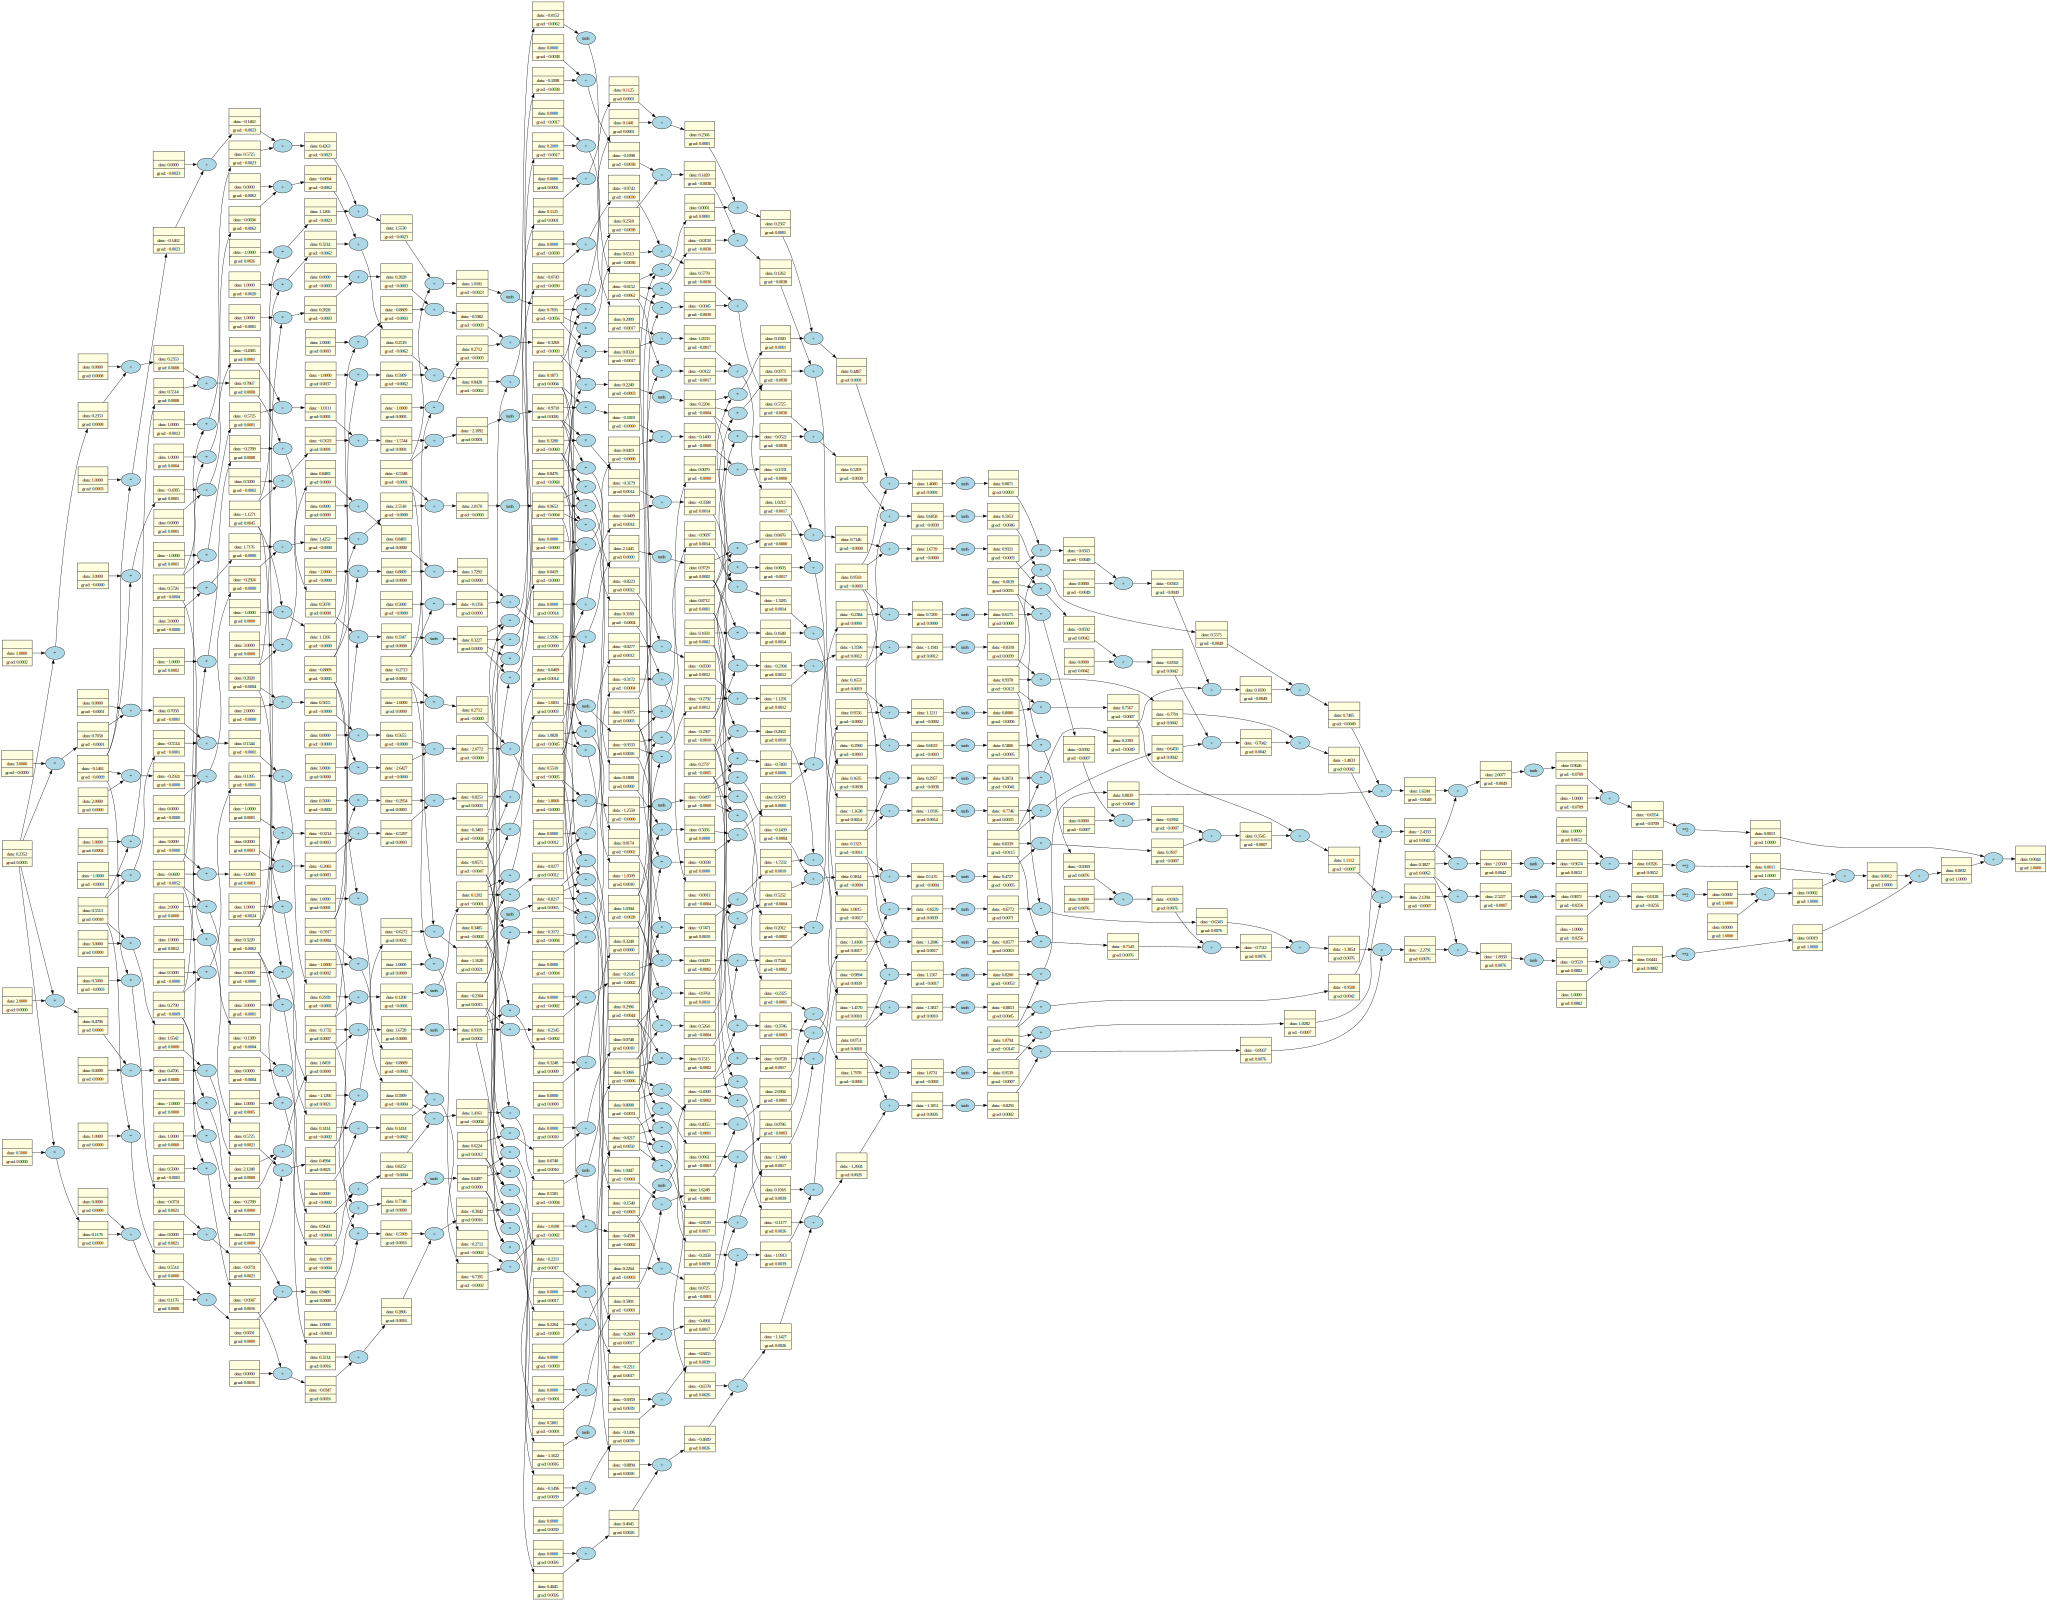

In [9]:
draw_dot(loss)